In [1]:
import sqlite3
conn = sqlite3.connect('example.db')
cursor = conn.cursor()


In [2]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS employees (
id INTEGER PRIMARY KEY AUTOINCREMENT,
name TEXT NOT NULL,
department TEXT NOT NULL,
salary REAL NOT NULL
)
''')


In [3]:
employee_data = [
    ('Alice', 'HR', 50000),
    ('Bob', 'Engineering', 60000),
    ('Charlie', 'Finance', 55000),
    ('Harry', 'Finance', 40000),
    ('Sam', 'Engineering', 70000),
    ('David', 'HR', 60000)
]
cursor.executemany('''
INSERT INTO employees (name, department, salary) VALUES (?, ?, ?)
''', employee_data)


In [4]:
conn.commit()
conn.close()


In [5]:
import pandas as pd
from sqlalchemy import create_engine


In [6]:
class DatabaseTable: 
    def __init__(self, table_name, connection_string): 
        self.table_name = table_name 
        self.engine = create_engine(connection_string) 
    def fetch_data(self): 
        query = f"SELECT * FROM {self.table_name}" 
        return pd.read_sql(query, self.engine)


In [7]:
table_name = 'employees'
connection_string = "sqlite:///example.db"  

In [8]:
db_table = DatabaseTable(table_name, connection_string)

In [9]:
data = db_table.fetch_data()
print(data)

    id     name   department   salary
0    1    Alice           HR  50000.0
1    2      Bob  Engineering  60000.0
2    3  Charlie      Finance  55000.0
3    4    Harry      Finance  40000.0
4    5      Sam  Engineering  70000.0
5    6    David           HR  60000.0
6    7    Alice           HR  50000.0
7    8      Bob  Engineering  60000.0
8    9  Charlie      Finance  55000.0
9   10    Harry      Finance  40000.0
10  11      Sam  Engineering  70000.0
11  12    David           HR  60000.0
12  13    Alice           HR  50000.0
13  14      Bob  Engineering  60000.0
14  15  Charlie      Finance  55000.0
15  16    Harry      Finance  40000.0
16  17      Sam  Engineering  70000.0
17  18    David           HR  60000.0


In [10]:
class EmployeeTable(DatabaseTable):
    def __init__(self, connection_string):
        super().__init__('employees', connection_string)
        self.metadata = {
            'table_name': 'employees',
            'description': 'Employee details and payroll information',
            'columns': {
                'id': 'Employee ID',
                'name': 'Employee Name',
                'department': 'Department Name',
                'salary': 'Salary of the Employee'
            }
        }


In [11]:
import pandas as pd
from transformers import pipeline
# from use_database_table import EmployeeTable
def fetch_data_from_table(table_name, connection_string):
    # Initialize the table object and fetch data
    table = EmployeeTable(connection_string)
    return table.fetch_data()



In [12]:
import pandasai
from pandasai import SmartDataframe

In [13]:
import os
# $2a$10$eSCjrm3l2fnZA.VyYjTHo.JtqjsK0PxgpQX2iL2BdRx.g2ESCEdxe
os.environ['PANDASAI_API_KEY'] = '$2a$10$eSCjrm3l2fnZA.VyYjTHo.JtqjsK0PxgpQX2iL2BdRx.g2ESCEdxe'

In [14]:
def ask_llm2(question,context):
    sdf = SmartDataframe(context)
    response = sdf.chat(question)
    return response

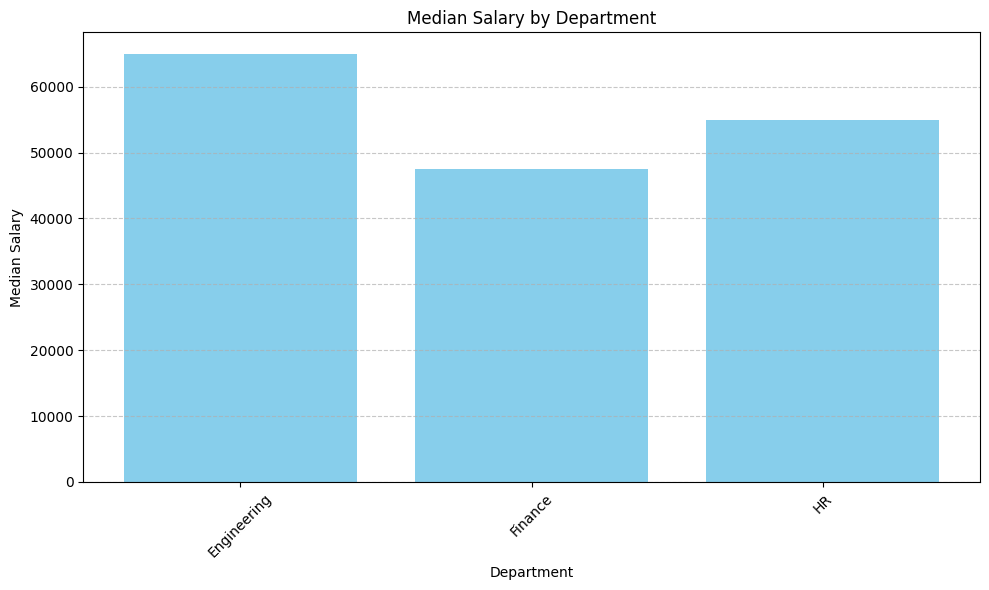

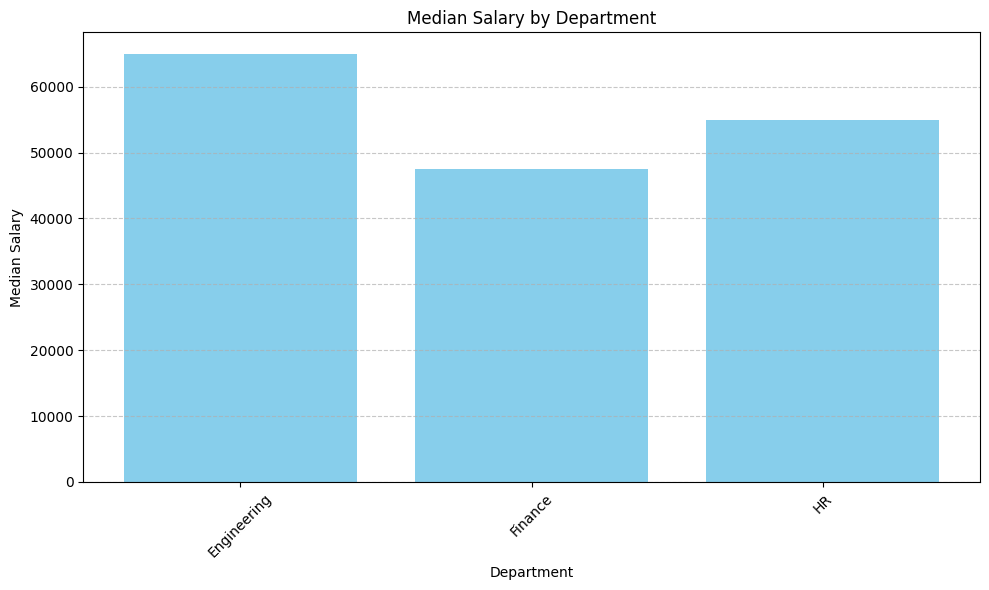

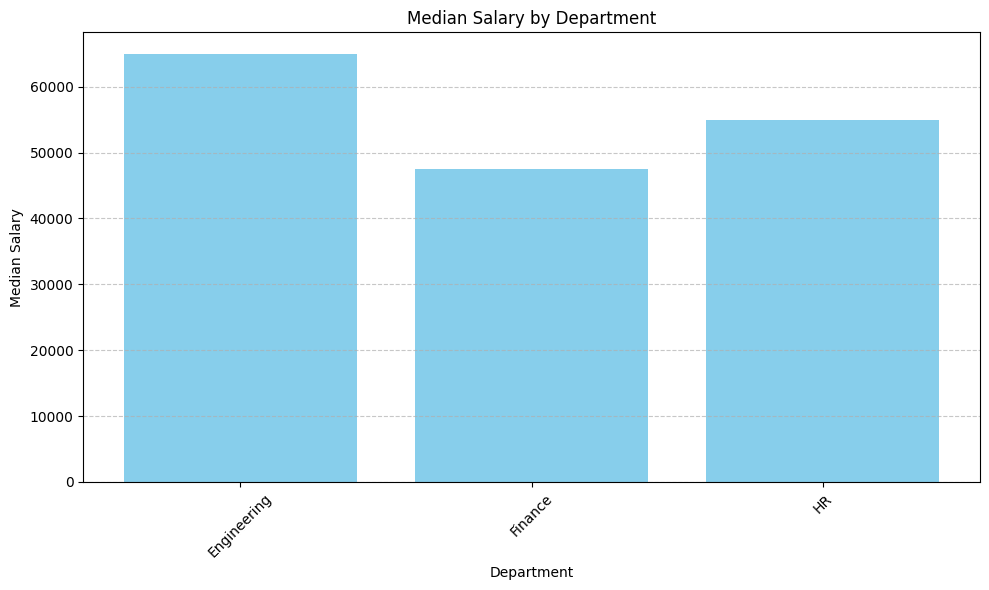

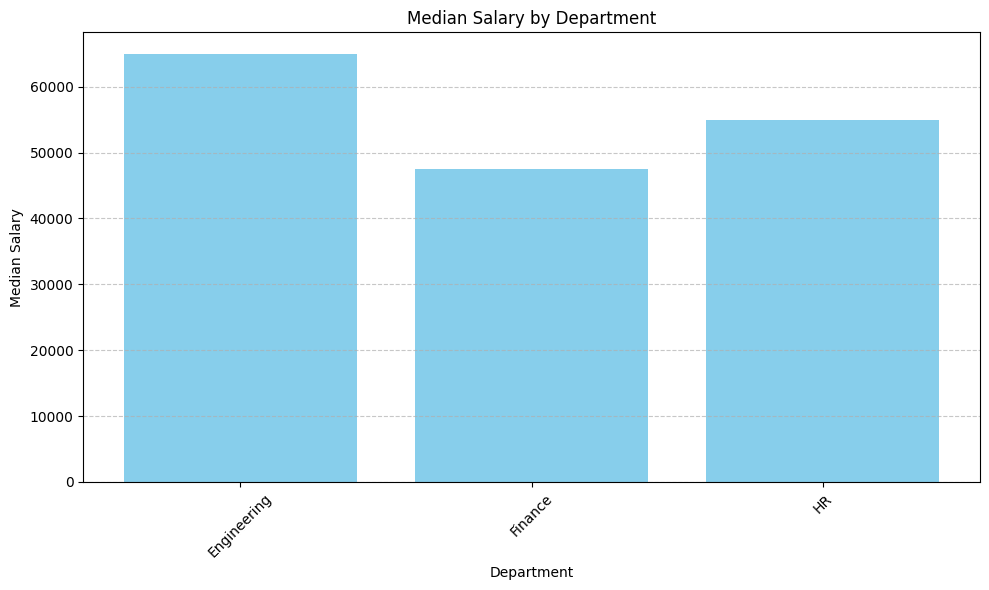

Traceback (most recent call last):
  File "c:\Users\SUMIT KUMAR\miniconda3\envs\pandasai_env\lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 310, in run
    ).run(input)
  File "c:\Users\SUMIT KUMAR\miniconda3\envs\pandasai_env\lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "c:\Users\SUMIT KUMAR\miniconda3\envs\pandasai_env\lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
  File "c:\Users\SUMIT KUMAR\miniconda3\envs\pandasai_env\lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "c:\Users\SUMIT KUMAR\miniconda3\envs\pandasai_env\lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
  File "c:\Users\SUMIT KUMAR\miniconda3\envs\pandasai_env\lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 175, in execute_code
    raise

Unfortunately, I was not able to answer your question, because of the following error:

No result returned



In [20]:
def main(): 
    connection_string = 'sqlite:///example.db' 
    table_name = 'employees' 
   # Fetch data from the employees table 
    context_df = fetch_data_from_table(table_name, connection_string) 
   # Ask the LLM a question directly 
    question = "could you give me the graph of median salary vs department" 
    response = ask_llm2(question, context_df)
    print(response) 
 
if __name__ == "__main__": 
    main() 


In [16]:
# pipe = pipeline("text-generation", model="pandasai/bamboo-llm")

In [17]:
# def ask_llm(question, context): 
#     # Convert context to string 
#     context_str = context.to_string(index=False) 
#     prompt = f"{question}\n\nContext:\n{context_str}" 
#     response = pipe(prompt, max_length=150, num_return_sequences=1, truncation=True) 
#     return response[0]['generated_text'] 


In [18]:
# def main(): 
#     connection_string = 'sqlite:///example.db' 
#     table_name = 'employees' 
#    # Fetch data from the employees table 
#     context_df = fetch_data_from_table(table_name, connection_string) 
#    # Ask the LLM a question directly 
#     question = "Find the highest paid employee with names for each department." 
#     response = ask_llm(question, context_df) 
#     print(response) 
 
# if __name__ == "__main__": 
#     main() 
